<a href="https://colab.research.google.com/github/Elmasri-Fathallah/Data-Analysis/blob/master/June_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install PyDrive

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [0]:

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#2. Get the file
downloaded = drive.CreateFile({'id':"1ymbgicSEvfnM4zORoJl-K-hDJn5Xb1mQ"})   # replace the id with id of file you want to access
downloaded.GetContentFile('june_19.csv')

In [0]:
df = pd.read_csv('june_19.csv', header=0) 

In [7]:
df.head()

,Unnamed: 0,Name,Column1,ACD Login,Hand,AHT,ATT,ACW,HLD,Ring,Avail,E-Mail Hand,Avail + AUX8,Break AUX1+AUX2,Lunch AUX1,Short AUX2,Social AUX21,Research AUX3,L2/L3/PSN AUX31,Training AUX4,Training AUX5,Nesting AUX51,PEP/QM AUX52,Callback AUX6,Mentoring AUX7,E-Mail AUX8,Meeting AUX9,System Issue AUX91,Login AUX0,Case Logs,Log.%,Short.%,NPS,Transfer Attempts,Transfer Rate,CSAT Answers,Answer Rate,AM Transfers,Tenure,E-Mail NPS,E-Mail CES,E-Mail FTR,Country,Avaya Id,Team,Site,Column2,Column3,Unnamed: 48
0,NaN,Overall,NaN,3867:49:34,18658,0:07:55,0:06:13,0:01:11,0:00:30,0:00:03,116:33:20,NaN,499:35:23,361:33:58,279:27:29,82:06:29,150:10:51,43:14:41,10:55:31,0:03:16,23:28:00,56:44:38,45:01:42,3:25:26,0:01:39,383:02:03,37:21:12,10:41:32,132:46:29,NaN,NaN,NaN,-,NaN,-,NaN,-,NaN,316928,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,"Aoun, Kevin",NaN,70:50:12,209,0:13:40,0:10:31,0:01:50,0:01:19,0:00:03,1:50:33,NaN,2:20:19,0:36:34,5:37:02,0:28:47,3:27:44,1:29:01,NaN,NaN,NaN,6:18:40,1:16:08,NaN,NaN,0:29:46,NaN,0:02:15,1:14:03,NaN,NaN,NaN,-,NaN,-,NaN,-,NaN,1050,-,-,-,ARA,602217.0,Mshwah,Berlin,150.0,0:10:14,NaN
2,2.0,"Yassen, Sameh Othman Mohamed",NaN,83:17:51,570,0:06:26,0:06:09,0:00:06,0:00:09,0:00:15,0:34:53,NaN,1:22:00,0:19:47,NaN,4:56:46,4:06:50,1:39:31,NaN,NaN,0:19:24,NaN,0:04:48,NaN,NaN,0:47:07,2:15:49,0:29:23,4:24:32,NaN,NaN,NaN,-,NaN,-,NaN,-,NaN,6300,-,-,-,ARA,602251.0,Mshwah,Berlin,724.0,0:06:13,NaN
3,3.0,"Abuhamra, Abdelrahman A.A",NaN,84:09:44,424,0:08:33,0:06:38,0:01:12,0:00:43,0:00:02,3:40:13,NaN,7:49:25,0:21:28,6:01:40,0:24:56,1:56:53,1:12:43,NaN,NaN,0:21:35,NaN,0:34:47,NaN,NaN,4:09:12,2:11:34,0:09:01,2:38:43,NaN,NaN,NaN,-,NaN,-,NaN,-,NaN,9036,-,-,-,ARA,602201.0,Elmasri,Berlin,525.0,0:07:32,NaN
4,4.0,"Sayed, Mohammad Moneer Mohammad Yehia",NaN,59:56:19,301,0:08:21,0:06:45,0:01:16,0:00:18,0:00:01,2:06:21,NaN,2:43:21,0:19:37,4:34:50,NaN,2:23:38,0:14:58,NaN,0:03:16,0:11:20,0:47:58,0:41:20,NaN,NaN,0:37:00,2:04:20,0:18:05,3:52:38,NaN,NaN,NaN,-,NaN,-,NaN,-,NaN,3360,-,-,-,ARA,602276.0,Mshwah,Berlin,606.0,0:07:27,NaN


Dropping 3 columns with irrelevant values

In [8]:
df1 = df.drop(columns=['Column1','Unnamed: 0','E-Mail Hand'])
df1.head(3)

,Name,ACD Login,Hand,AHT,ATT,ACW,HLD,Ring,Avail,Avail + AUX8,Break AUX1+AUX2,Lunch AUX1,Short AUX2,Social AUX21,Research AUX3,L2/L3/PSN AUX31,Training AUX4,Training AUX5,Nesting AUX51,PEP/QM AUX52,Callback AUX6,Mentoring AUX7,E-Mail AUX8,Meeting AUX9,System Issue AUX91,Login AUX0,Case Logs,Log.%,Short.%,NPS,Transfer Attempts,Transfer Rate,CSAT Answers,Answer Rate,AM Transfers,Tenure,E-Mail NPS,E-Mail CES,E-Mail FTR,Country,Avaya Id,Team,Site,Column2,Column3,Unnamed: 48
0,Overall,3867:49:34,18658,0:07:55,0:06:13,0:01:11,0:00:30,0:00:03,116:33:20,499:35:23,361:33:58,279:27:29,82:06:29,150:10:51,43:14:41,10:55:31,0:03:16,23:28:00,56:44:38,45:01:42,3:25:26,0:01:39,383:02:03,37:21:12,10:41:32,132:46:29,NaN,NaN,NaN,-,NaN,-,NaN,-,NaN,316928,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Aoun, Kevin",70:50:12,209,0:13:40,0:10:31,0:01:50,0:01:19,0:00:03,1:50:33,2:20:19,0:36:34,5:37:02,0:28:47,3:27:44,1:29:01,NaN,NaN,NaN,6:18:40,1:16:08,NaN,NaN,0:29:46,NaN,0:02:15,1:14:03,NaN,NaN,NaN,-,NaN,-,NaN,-,NaN,1050,-,-,-,ARA,602217.0,Mshwah,Berlin,150.0,0:10:14,NaN
2,"Yassen, Sameh Othman Mohamed",83:17:51,570,0:06:26,0:06:09,0:00:06,0:00:09,0:00:15,0:34:53,1:22:00,0:19:47,NaN,4:56:46,4:06:50,1:39:31,NaN,NaN,0:19:24,NaN,0:04:48,NaN,NaN,0:47:07,2:15:49,0:29:23,4:24:32,NaN,NaN,NaN,-,NaN,-,NaN,-,NaN,6300,-,-,-,ARA,602251.0,Mshwah,Berlin,724.0,0:06:13,NaN


Dropping Overall Row

In [9]:
df2 = df1.drop([0])
df2.head()

,Name,ACD Login,Hand,AHT,ATT,ACW,HLD,Ring,Avail,Avail + AUX8,Break AUX1+AUX2,Lunch AUX1,Short AUX2,Social AUX21,Research AUX3,L2/L3/PSN AUX31,Training AUX4,Training AUX5,Nesting AUX51,PEP/QM AUX52,Callback AUX6,Mentoring AUX7,E-Mail AUX8,Meeting AUX9,System Issue AUX91,Login AUX0,Case Logs,Log.%,Short.%,NPS,Transfer Attempts,Transfer Rate,CSAT Answers,Answer Rate,AM Transfers,Tenure,E-Mail NPS,E-Mail CES,E-Mail FTR,Country,Avaya Id,Team,Site,Column2,Column3,Unnamed: 48
1,"Aoun, Kevin",70:50:12,209,0:13:40,0:10:31,0:01:50,0:01:19,0:00:03,1:50:33,2:20:19,0:36:34,5:37:02,0:28:47,3:27:44,1:29:01,NaN,NaN,NaN,6:18:40,1:16:08,NaN,NaN,0:29:46,NaN,0:02:15,1:14:03,NaN,NaN,NaN,-,NaN,-,NaN,-,NaN,1050,-,-,-,ARA,602217.0,Mshwah,Berlin,150.0,0:10:14,NaN
2,"Yassen, Sameh Othman Mohamed",83:17:51,570,0:06:26,0:06:09,0:00:06,0:00:09,0:00:15,0:34:53,1:22:00,0:19:47,NaN,4:56:46,4:06:50,1:39:31,NaN,NaN,0:19:24,NaN,0:04:48,NaN,NaN,0:47:07,2:15:49,0:29:23,4:24:32,NaN,NaN,NaN,-,NaN,-,NaN,-,NaN,6300,-,-,-,ARA,602251.0,Mshwah,Berlin,724.0,0:06:13,NaN
3,"Abuhamra, Abdelrahman A.A",84:09:44,424,0:08:33,0:06:38,0:01:12,0:00:43,0:00:02,3:40:13,7:49:25,0:21:28,6:01:40,0:24:56,1:56:53,1:12:43,NaN,NaN,0:21:35,NaN,0:34:47,NaN,NaN,4:09:12,2:11:34,0:09:01,2:38:43,NaN,NaN,NaN,-,NaN,-,NaN,-,NaN,9036,-,-,-,ARA,602201.0,Elmasri,Berlin,525.0,0:07:32,NaN
4,"Sayed, Mohammad Moneer Mohammad Yehia",59:56:19,301,0:08:21,0:06:45,0:01:16,0:00:18,0:00:01,2:06:21,2:43:21,0:19:37,4:34:50,NaN,2:23:38,0:14:58,NaN,0:03:16,0:11:20,0:47:58,0:41:20,NaN,NaN,0:37:00,2:04:20,0:18:05,3:52:38,NaN,NaN,NaN,-,NaN,-,NaN,-,NaN,3360,-,-,-,ARA,602276.0,Mshwah,Berlin,606.0,0:07:27,NaN
5,"Mahareeq, Ahmed Mohamed",70:53:45,370,0:08:59,0:07:45,0:00:50,0:00:22,0:00:01,0:33:21,1:23:01,0:24:20,5:03:48,1:25:46,0:16:00,1:21:51,NaN,NaN,0:14:07,NaN,0:04:26,NaN,0:01:39,0:49:40,2:14:16,NaN,3:13:57,NaN,NaN,NaN,-,NaN,-,NaN,-,NaN,6752,-,-,-,ARA,602312.0,Mshwah,Berlin,490.0,0:08:27,NaN


In [10]:
print(df2.dtypes)

Name                   object
ACD Login              object
Hand                    int64
AHT                    object
ATT                    object
ACW                    object
HLD                    object
Ring                   object
Avail                  object
Avail + AUX8           object
Break AUX1+AUX2        object
Lunch AUX1             object
Short AUX2             object
Social AUX21           object
Research AUX3          object
L2/L3/PSN AUX31        object
Training AUX4          object
Training AUX5          object
Nesting AUX51          object
PEP/QM AUX52           object
Callback AUX6          object
Mentoring AUX7         object
E-Mail AUX8            object
Meeting AUX9           object
System Issue AUX91     object
Login AUX0             object
Case Logs             float64
Log.%                 float64
Short.%               float64
NPS                    object
Transfer Attempts     float64
Transfer Rate          object
CSAT Answers          float64
Answer Rat

In [11]:

df2['ATT'] = pd.to_timedelta(df2.ATT, unit='m', errors='ignore')
df2['ACW'] = pd.to_timedelta(df2.ACW, unit='m', errors='ignore')
df2['HLD'] = pd.to_timedelta(df2.HLD, unit='m', errors='ignore')
df2['Ring'] = pd.to_timedelta(df2.Ring, unit='m', errors='ignore')
df2['Avail'] = pd.to_timedelta(df2.Avail, unit='m', errors='ignore')
df2['AHT'] = pd.to_timedelta(df2.AHT, unit='m', errors='ignore')

df2.head(3)


,Name,ACD Login,Hand,AHT,ATT,ACW,HLD,Ring,Avail,Avail + AUX8,Break AUX1+AUX2,Lunch AUX1,Short AUX2,Social AUX21,Research AUX3,L2/L3/PSN AUX31,Training AUX4,Training AUX5,Nesting AUX51,PEP/QM AUX52,Callback AUX6,Mentoring AUX7,E-Mail AUX8,Meeting AUX9,System Issue AUX91,Login AUX0,Case Logs,Log.%,Short.%,NPS,Transfer Attempts,Transfer Rate,CSAT Answers,Answer Rate,AM Transfers,Tenure,E-Mail NPS,E-Mail CES,E-Mail FTR,Country,Avaya Id,Team,Site,Column2,Column3,Unnamed: 48
1,"Aoun, Kevin",70:50:12,209,00:13:40,00:10:31,00:01:50,00:01:19,00:00:03,01:50:33,2:20:19,0:36:34,5:37:02,0:28:47,3:27:44,1:29:01,NaN,NaN,NaN,6:18:40,1:16:08,NaN,NaN,0:29:46,NaN,0:02:15,1:14:03,NaN,NaN,NaN,-,NaN,-,NaN,-,NaN,1050,-,-,-,ARA,602217.0,Mshwah,Berlin,150.0,0:10:14,NaN
2,"Yassen, Sameh Othman Mohamed",83:17:51,570,00:06:26,00:06:09,00:00:06,00:00:09,00:00:15,00:34:53,1:22:00,0:19:47,NaN,4:56:46,4:06:50,1:39:31,NaN,NaN,0:19:24,NaN,0:04:48,NaN,NaN,0:47:07,2:15:49,0:29:23,4:24:32,NaN,NaN,NaN,-,NaN,-,NaN,-,NaN,6300,-,-,-,ARA,602251.0,Mshwah,Berlin,724.0,0:06:13,NaN
3,"Abuhamra, Abdelrahman A.A",84:09:44,424,00:08:33,00:06:38,00:01:12,00:00:43,00:00:02,03:40:13,7:49:25,0:21:28,6:01:40,0:24:56,1:56:53,1:12:43,NaN,NaN,0:21:35,NaN,0:34:47,NaN,NaN,4:09:12,2:11:34,0:09:01,2:38:43,NaN,NaN,NaN,-,NaN,-,NaN,-,NaN,9036,-,-,-,ARA,602201.0,Elmasri,Berlin,525.0,0:07:32,NaN


In [12]:
call = df2.loc[ :,'Name':'Avail']
call.head()

,Name,ACD Login,Hand,AHT,ATT,ACW,HLD,Ring,Avail
1,"Aoun, Kevin",70:50:12,209,00:13:40,00:10:31,00:01:50,00:01:19,00:00:03,01:50:33
2,"Yassen, Sameh Othman Mohamed",83:17:51,570,00:06:26,00:06:09,00:00:06,00:00:09,00:00:15,00:34:53
3,"Abuhamra, Abdelrahman A.A",84:09:44,424,00:08:33,00:06:38,00:01:12,00:00:43,00:00:02,03:40:13
4,"Sayed, Mohammad Moneer Mohammad Yehia",59:56:19,301,00:08:21,00:06:45,00:01:16,00:00:18,00:00:01,02:06:21
5,"Mahareeq, Ahmed Mohamed",70:53:45,370,00:08:59,00:07:45,00:00:50,00:00:22,00:00:01,00:33:21


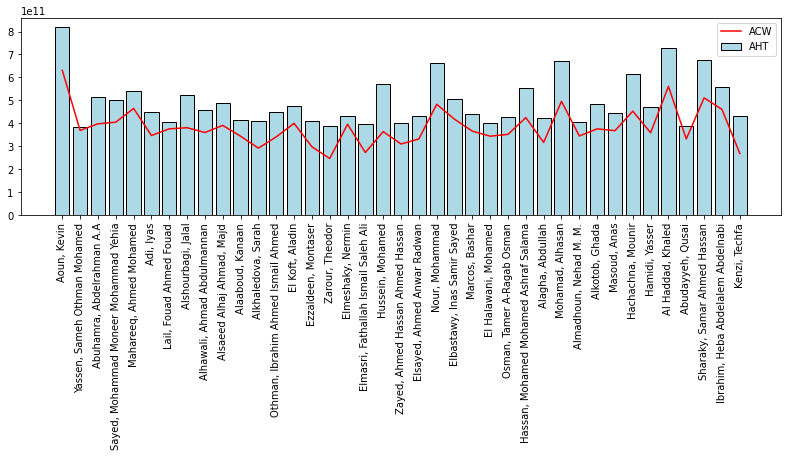

In [51]:
plt.figure(figsize=(30,8))

plt.subplot(2,2,1)
plt.bar(call.Name, call.AHT, width=0.8, color='lightblue', edgecolor='black', tick_label=call.AHT)
plt.plot(call.Name, call.ATT, 'r')
plt.xticks(call.Name, call.Name, rotation='vertical')
plt.legend(['ACW','AHT'])
plt.show()


In [0]:
plt.subplot(2,2,2)
plt.plot(call.Name, call.ATT)
plt.xticks(call.Name, call.Name, rotation='vertical')

plt.subplot(2,2,3)
plt.plot(call.Name, call.HLD)
plt.xticks(call.Name, call.Name, rotation='vertical')

plt.subplot(2,2,4)
plt.bar(call.Name, call.AHT)
plt.xticks(call.Name, call.Name, rotation='vertical')

plt.xticks(call.Name, call.Name, rotation='vertical')
plt.title('AHT Per Agent - June 2019')
plt.xlabel('Agent Name')
plt.ylabel('AHT (minutes)')

plt.show()